## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.273303  1.225161  1.386999  0.169983  1.195215  1.410958
1  1.440161 -1.262570  1.239129 -1.526443  1.211796 -0.747666
2  0.902343 -0.846963 -0.892046 -1.509378 -1.683176 -1.285940
3  0.537128 -1.746468 -0.958492 -1.417272 -1.429539 -2.233928
4  1.114160  0.334826 -1.200869 -1.060132  0.124081  0.579918


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9859833	total: 61ms	remaining: 1m
1:	learn: 0.9769743	total: 61.7ms	remaining: 30.8s
2:	learn: 0.9662700	total: 62.2ms	remaining: 20.7s
3:	learn: 0.9553464	total: 62.7ms	remaining: 15.6s
4:	learn: 0.9457971	total: 63.3ms	remaining: 12.6s
5:	learn: 0.9371633	total: 63.8ms	remaining: 10.6s
6:	learn: 0.9266371	total: 64.2ms	remaining: 9.11s
7:	learn: 0.9169058	total: 64.7ms	remaining: 8.03s
8:	learn: 0.9081759	total: 65.3ms	remaining: 7.19s
9:	learn: 0.8989625	total: 65.8ms	remaining: 6.51s
10:	learn: 0.8900617	total: 66.2ms	remaining: 5.95s
11:	learn: 0.8799659	total: 67.4ms	remaining: 5.55s
12:	learn: 0.8698721	total: 67.8ms	remaining: 5.14s
13:	learn: 0.8618407	total: 68.1ms	remaining: 4.8s
14:	learn: 0.8535385	total: 68.6ms	remaining: 4.5s
15:	learn: 0.8459955	total: 69.1ms	remaining: 4.25s
16:	learn: 0.8381176	total: 69.5ms	remaining: 4.02s
17:	learn: 0.8294645	total: 70ms	remaining: 3.82s
18:	learn: 0.8220347	total: 70.5ms	remaining: 3.64s
1

88:	learn: 0.4379087	total: 104ms	remaining: 1.07s
89:	learn: 0.4342045	total: 105ms	remaining: 1.06s
90:	learn: 0.4308149	total: 105ms	remaining: 1.05s
91:	learn: 0.4274838	total: 106ms	remaining: 1.04s
92:	learn: 0.4240352	total: 106ms	remaining: 1.03s
93:	learn: 0.4200817	total: 107ms	remaining: 1.03s
94:	learn: 0.4168797	total: 108ms	remaining: 1.02s
95:	learn: 0.4130140	total: 108ms	remaining: 1.02s
96:	learn: 0.4098587	total: 109ms	remaining: 1.01s
97:	learn: 0.4064406	total: 109ms	remaining: 1s
98:	learn: 0.4035720	total: 109ms	remaining: 996ms
99:	learn: 0.4000288	total: 110ms	remaining: 989ms
100:	learn: 0.3968232	total: 110ms	remaining: 980ms
101:	learn: 0.3934175	total: 110ms	remaining: 973ms
102:	learn: 0.3907467	total: 111ms	remaining: 966ms
103:	learn: 0.3873764	total: 111ms	remaining: 959ms
104:	learn: 0.3841500	total: 112ms	remaining: 952ms
105:	learn: 0.3807599	total: 112ms	remaining: 947ms
106:	learn: 0.3774342	total: 113ms	remaining: 939ms
107:	learn: 0.3746705	total

259:	learn: 0.1264955	total: 188ms	remaining: 535ms
260:	learn: 0.1258251	total: 188ms	remaining: 533ms
261:	learn: 0.1251735	total: 189ms	remaining: 532ms
262:	learn: 0.1246094	total: 189ms	remaining: 531ms
263:	learn: 0.1238999	total: 190ms	remaining: 529ms
264:	learn: 0.1233289	total: 190ms	remaining: 528ms
265:	learn: 0.1226511	total: 191ms	remaining: 526ms
266:	learn: 0.1218972	total: 191ms	remaining: 525ms
267:	learn: 0.1211066	total: 192ms	remaining: 523ms
268:	learn: 0.1205136	total: 192ms	remaining: 522ms
269:	learn: 0.1199926	total: 192ms	remaining: 520ms
270:	learn: 0.1189464	total: 193ms	remaining: 520ms
271:	learn: 0.1182863	total: 194ms	remaining: 518ms
272:	learn: 0.1177983	total: 194ms	remaining: 517ms
273:	learn: 0.1172995	total: 195ms	remaining: 516ms
274:	learn: 0.1165297	total: 195ms	remaining: 514ms
275:	learn: 0.1160283	total: 196ms	remaining: 513ms
276:	learn: 0.1152038	total: 196ms	remaining: 512ms
277:	learn: 0.1147332	total: 196ms	remaining: 510ms
278:	learn: 

465:	learn: 0.0453900	total: 288ms	remaining: 330ms
466:	learn: 0.0452224	total: 288ms	remaining: 329ms
467:	learn: 0.0449829	total: 289ms	remaining: 328ms
468:	learn: 0.0448622	total: 289ms	remaining: 327ms
469:	learn: 0.0447440	total: 290ms	remaining: 327ms
470:	learn: 0.0445244	total: 290ms	remaining: 326ms
471:	learn: 0.0444093	total: 291ms	remaining: 325ms
472:	learn: 0.0441943	total: 291ms	remaining: 324ms
473:	learn: 0.0439831	total: 291ms	remaining: 323ms
474:	learn: 0.0437768	total: 292ms	remaining: 323ms
475:	learn: 0.0435703	total: 292ms	remaining: 322ms
476:	learn: 0.0433674	total: 293ms	remaining: 321ms
477:	learn: 0.0430638	total: 293ms	remaining: 320ms
478:	learn: 0.0428624	total: 294ms	remaining: 320ms
479:	learn: 0.0426804	total: 294ms	remaining: 319ms
480:	learn: 0.0425574	total: 295ms	remaining: 318ms
481:	learn: 0.0424068	total: 295ms	remaining: 317ms
482:	learn: 0.0422544	total: 295ms	remaining: 316ms
483:	learn: 0.0421672	total: 296ms	remaining: 315ms
484:	learn: 

634:	learn: 0.0249909	total: 371ms	remaining: 213ms
635:	learn: 0.0249500	total: 372ms	remaining: 213ms
636:	learn: 0.0248761	total: 372ms	remaining: 212ms
637:	learn: 0.0247337	total: 373ms	remaining: 211ms
638:	learn: 0.0246612	total: 373ms	remaining: 211ms
639:	learn: 0.0245897	total: 373ms	remaining: 210ms
640:	learn: 0.0245193	total: 374ms	remaining: 209ms
641:	learn: 0.0244831	total: 374ms	remaining: 209ms
642:	learn: 0.0244137	total: 375ms	remaining: 208ms
643:	learn: 0.0242761	total: 375ms	remaining: 207ms
644:	learn: 0.0241796	total: 376ms	remaining: 207ms
645:	learn: 0.0241404	total: 376ms	remaining: 206ms
646:	learn: 0.0240733	total: 377ms	remaining: 206ms
647:	learn: 0.0239397	total: 377ms	remaining: 205ms
648:	learn: 0.0238559	total: 378ms	remaining: 204ms
649:	learn: 0.0237736	total: 378ms	remaining: 204ms
650:	learn: 0.0236927	total: 378ms	remaining: 203ms
651:	learn: 0.0236199	total: 379ms	remaining: 202ms
652:	learn: 0.0235484	total: 379ms	remaining: 202ms
653:	learn: 

814:	learn: 0.0128503	total: 472ms	remaining: 107ms
815:	learn: 0.0128304	total: 473ms	remaining: 107ms
816:	learn: 0.0127604	total: 473ms	remaining: 106ms
817:	learn: 0.0127075	total: 474ms	remaining: 105ms
818:	learn: 0.0126547	total: 474ms	remaining: 105ms
819:	learn: 0.0125844	total: 475ms	remaining: 104ms
820:	learn: 0.0125333	total: 475ms	remaining: 104ms
821:	learn: 0.0124663	total: 476ms	remaining: 103ms
822:	learn: 0.0124362	total: 476ms	remaining: 102ms
823:	learn: 0.0124132	total: 476ms	remaining: 102ms
824:	learn: 0.0123677	total: 477ms	remaining: 101ms
825:	learn: 0.0122972	total: 477ms	remaining: 101ms
826:	learn: 0.0122283	total: 478ms	remaining: 100ms
827:	learn: 0.0121648	total: 478ms	remaining: 99.4ms
828:	learn: 0.0121162	total: 479ms	remaining: 98.8ms
829:	learn: 0.0120874	total: 479ms	remaining: 98.2ms
830:	learn: 0.0120402	total: 480ms	remaining: 97.6ms
831:	learn: 0.0120121	total: 480ms	remaining: 97ms
832:	learn: 0.0119461	total: 481ms	remaining: 96.4ms
833:	lea

986:	learn: 0.0066195	total: 556ms	remaining: 7.32ms
987:	learn: 0.0065950	total: 556ms	remaining: 6.76ms
988:	learn: 0.0065839	total: 557ms	remaining: 6.2ms
989:	learn: 0.0065769	total: 557ms	remaining: 5.63ms
990:	learn: 0.0065532	total: 558ms	remaining: 5.07ms
991:	learn: 0.0065332	total: 558ms	remaining: 4.5ms
992:	learn: 0.0065197	total: 559ms	remaining: 3.94ms
993:	learn: 0.0064859	total: 559ms	remaining: 3.38ms
994:	learn: 0.0064702	total: 560ms	remaining: 2.81ms
995:	learn: 0.0064411	total: 560ms	remaining: 2.25ms
996:	learn: 0.0064184	total: 561ms	remaining: 1.69ms
997:	learn: 0.0063955	total: 561ms	remaining: 1.12ms
998:	learn: 0.0063723	total: 561ms	remaining: 562us
999:	learn: 0.0063432	total: 562ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

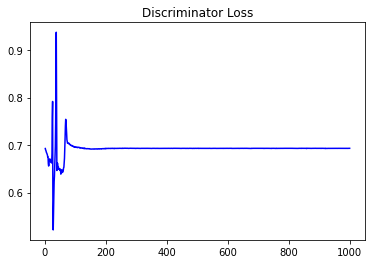

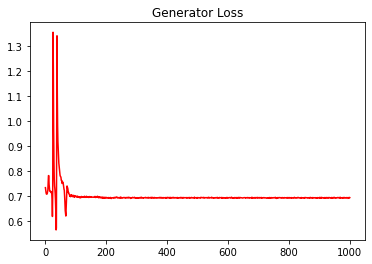

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.075593114479371


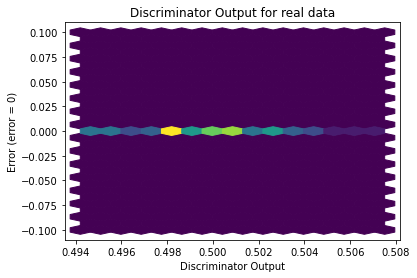

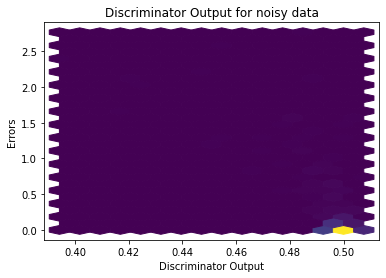

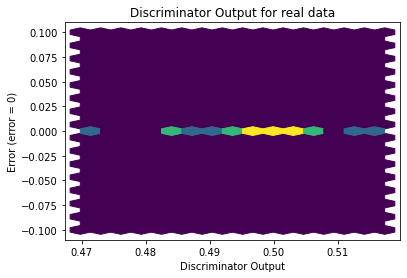

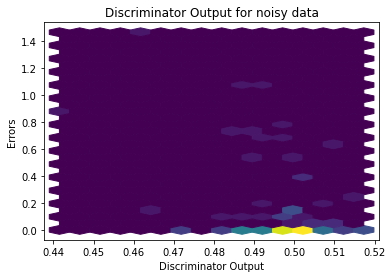

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


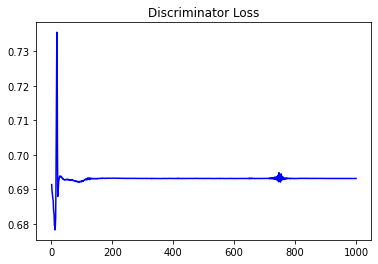

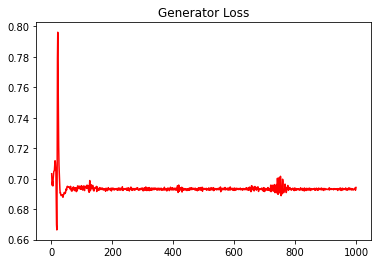

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10044202870330037


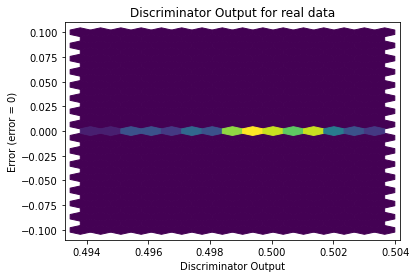

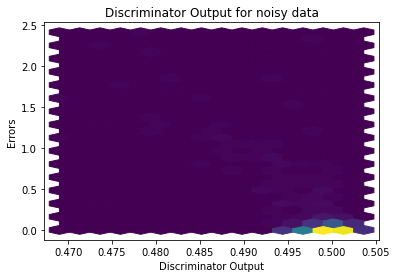

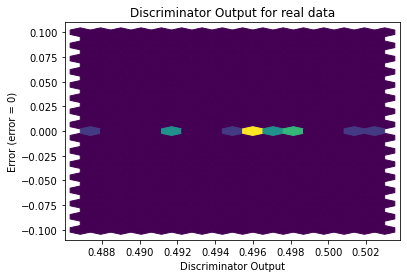

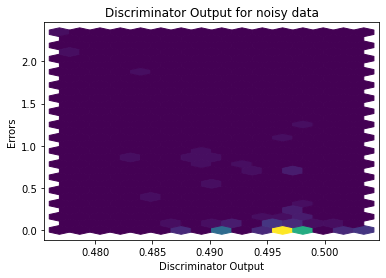

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3829]], requires_grad=True)
